In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Step 2: Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv("story_df.csv")
df.shape

(7278, 203)

In [5]:
df.head()

,iid,gender_x,piid,match_x,age_x,field_cd_x,race_x,imprace_x,imprelig_x,from_x,income_x,goal_x,date_x,go_out_x,career_c_x,sports_x,tvsports_x,exercise_x,dining_x,museums_x,art_x,hiking_x,gaming_x,clubbing_x,reading_x,tv_x,theater_x,movies_x,concerts_x,music_x,shopping_x,yoga_x,exphappy_x,attr1_1_x,sinc1_1_x,intel1_1_x,fun1_1_x,amb1_1_x,shar1_1_x,attr2_1_x,sinc2_1_x,intel2_1_x,fun2_1_x,amb2_1_x,shar2_1_x,attr3_1_x,sinc3_1_x,fun3_1_x,intel3_1_x,amb3_1_x,...,f3social_sci_y,f4medical_sci_y,f5engineering_y,f6english_y,f7hist_y,f8business_y,f9edu_y,f10bio_sci_y,f11social_work_y,f12undergrad_y,f13poli_sci_y,f14film_y,f15arts_y,f16languages_y,f17architecture_y,f18other_y,r1black_y,r2european_y,r3latino_y,r4asian_y,r6other_y,c1lawyer_y,c2academic_y,c3psycho_y,c4doctor_y,c5engineer_y,c6entertainment_y,c7banking_y,c8real_estate_y,c9inter_affairs_y,c10undeci_y,c11social_work_y,c12speech_y,c13politics_y,c14sports_y,c15other_y,c16journalism_y,c17architecture_y,goal_s_y,sum_in_z,age_d_z,imprace_d_z,imprelig_d_z,date_d_z,go_out_d_z,goal_d_z,career_d_z,field_d_z,race_d_z,from_d_z
0,11,1,1,0,27,8,2,7,3,Argentina,2683,1,5,4,2,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,35,20,20,20,0,5,25,5,20,20,25,5,8,9,7,8,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,557,6,5,-1,-2,3,1,0,0,0,0
1,11,1,2,0,27,8,2,7,3,Argentina,2683,1,5,4,2,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,35,20,20,20,0,5,25,5,20,20,25,5,8,9,7,8,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,591,3,5,-2,0,3,1,0,0,1,0
2,11,1,3,0,27,8,2,7,3,Argentina,2683,1,5,4,2,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,35,20,20,20,0,5,25,5,20,20,25,5,8,9,7,8,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,581,2,-1,-1,2,3,1,0,0,1,0
3,11,1,4,0,27,8,2,7,3,Argentina,2683,1,5,4,2,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,35,20,20,20,0,5,25,5,20,20,25,5,8,9,7,8,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,528,4,6,2,0,3,1,0,0,1,0
4,11,1,5,0,27,8,2,7,3,Argentina,2683,1,5,4,2,8,7,2,6,7,5,5,5,4,9,2,4,8,7,8,5,1,7,35,20,20,20,0,5,25,5,20,20,25,5,8,9,7,8,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,576,6,-1,2,1,3,1,0,0,1,0


Dataset df contains 7278 data points, 86 features. After groupby participants unique ids, we found out there are 524 participants in this study in total, in which 259 are women and 265 are men. 

In [6]:
from collections import Counter

In [7]:
# grouped dataset
g_df = df.groupby('iid')
len(g_df)

524

In [8]:
# grouped datasets for women and men
wdf = g_wdf = df[df['gender_x'] == 0]
mdf = g_wdf = df[df['gender_x'] == 1]
g_wdf = wdf.groupby('iid')
g_mdf = mdf.groupby('iid')

print 'Number of women participants: ', len(g_wdf)
print 'Number of men participants: ',  len(g_mdf)

Number of women participants:  259
Number of men participants:  265


We first applied Exploratory Data Analysis to get a general idea of what the dataset looks like. We explored trends for some features to gained insights into the data. In this section, we used various visualizations in an attempt to explore the important features that determine whether a pair of women and men are matched.

### Matching Rate

We first look at the proportion of matching rate and plot it using pie plot. There are in total 7278 pairs, among which 1190 pairs are sucessfully matched and 6088 pairs are not matched. 

In [192]:
print 'Total number of pairs: ', len(df)
print 'Number of matching pairs: ', sum(df['match_x'] == 0)
print 'Number of non-matching pairs: ', sum(df['match_x'] == 1)
pies = [sum(df['match_x'] == 0), sum(df['match_x'] == 1)]

Total number of pairs:  7278
Number of matching pairs:  6088
Number of non-matching pairs:  1190


([<matplotlib.patches.Wedge at 0x10f6dd290>,
  <matplotlib.text.Text at 0x10ad4d7d0>])

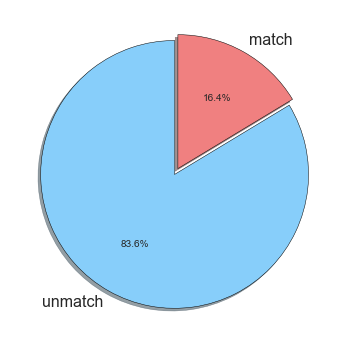

In [265]:
from pylab import *
figure(1, figsize=(6,6))
labels2 = 'unmatch', 'match'
colors = ['lightskyblue', 'lightcoral']
explode=(0, 0.05)
pie(pies, explode=explode, labels = labels2, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)

### Age Distribution

We plotted the distribution of all participants' age. We could see from both histogram and boxplot that the age of participants does not vary much with mean 26. Women and men's mean age are also very close. This is possibly because most participants are still students in college or graduate school.

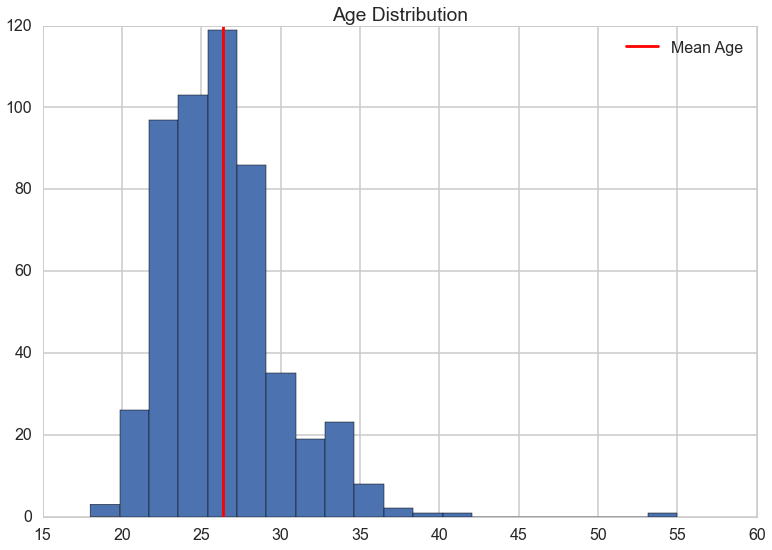

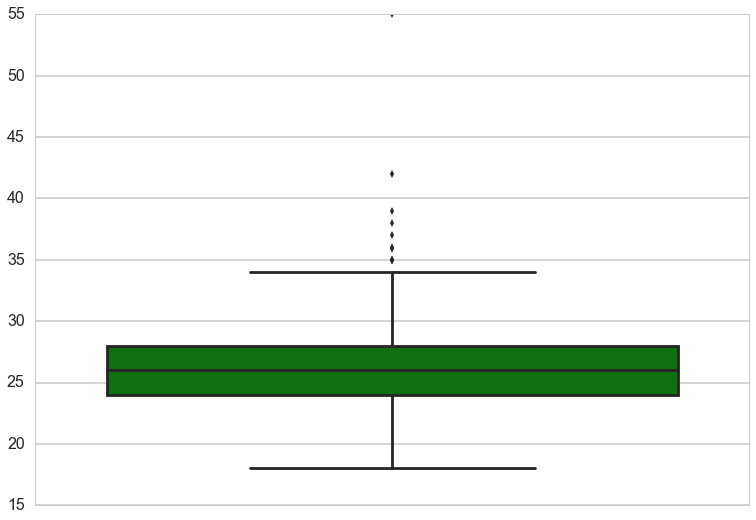

In [263]:
plt.hist(g_df['age_x'].mean().values, bins=20)
plt.axvline(np.mean(g_df['age_x'].mean().values), 0, 1, color='r', label='Mean Age')
plt.title('Age Distribution')
plt.legend();
plt.show();

sns.boxplot(g_df['age_x'].mean().values, orient="v", color = 'green')
plt.legend();
plt.show();

In [10]:
print "Age mean: ", np.mean(g_df['age_x'].mean().values);
print "Age min: ", min(g_df['age_x'].mean().values);
print "Age max: ", max(g_df['age_x'].mean().values);

Age mean:  26.393129771
Age min:  18
Age max:  55


In [11]:
print 'Avg women age: ', np.mean(g_wdf['age_x'].mean().values)
print 'Avg men age: ', np.mean(g_mdf['age_x'].mean().values)

Avg women age:  26.1544401544
Avg men age:  26.6264150943


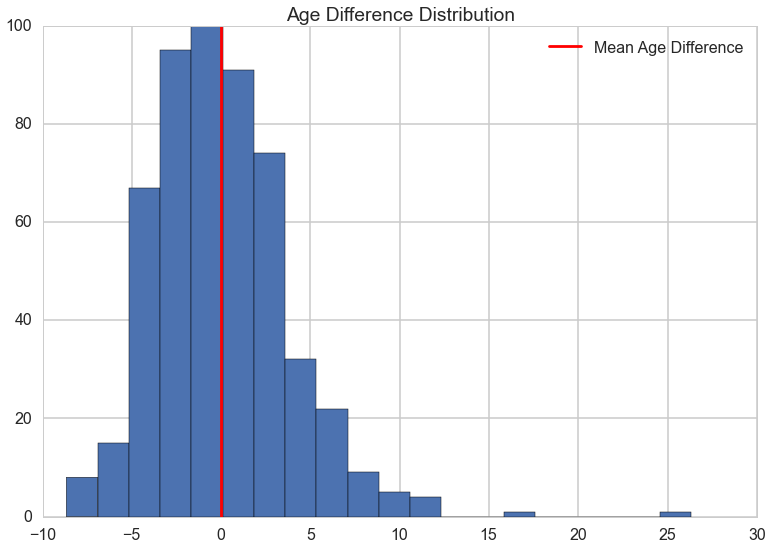

Age Diff mean:  0.0186940407915
Age Diff min:  -8.66666666667
Age Diff max:  26.3333333333


In [253]:
plt.hist(g_df['age_d_z'].mean().values, bins=20)
plt.axvline(np.mean(g_df['age_d_z'].mean().values), 0, 1, color='r', label='Mean Age Difference')
plt.title('Age Difference Distribution')
plt.legend();
plt.show();

print "Age Diff mean: ", np.mean(g_df['age_d_z'].mean().values);
print "Age Diff min: ", min(g_df['age_d_z'].mean().values);
print "Age Diff max: ", max(g_df['age_d_z'].mean().values);

#### Age Difference Distribution

In [12]:
print 'Avg age difference for matching pairs: ', np.mean(mdf[mdf['match_x'] == 1]['age_d_z'])
print 'Avg age difference for unmatching pairs: ', np.mean(mdf[mdf['match_x'] == 0]['age_d_z'])

Avg age difference for matching pairs:  0.58487394958
Avg age difference for unmatching pairs:  0.518725361367


We could see that for matching pairs, men are 0.584 years older than women on average.
For unmatching pairs, men are 0.518 years older than women on average.
The age differences for these two groups are very minor.

### Race Distribution

We then went on to explore the race distribution and whether or not being in the same race effect matching rate. We discovered that matching rate among same-race pairs (0.173) is higher than matching rate among same-race pairs (0.157). Thus race can be an important feature that affect matching rate between pairs.

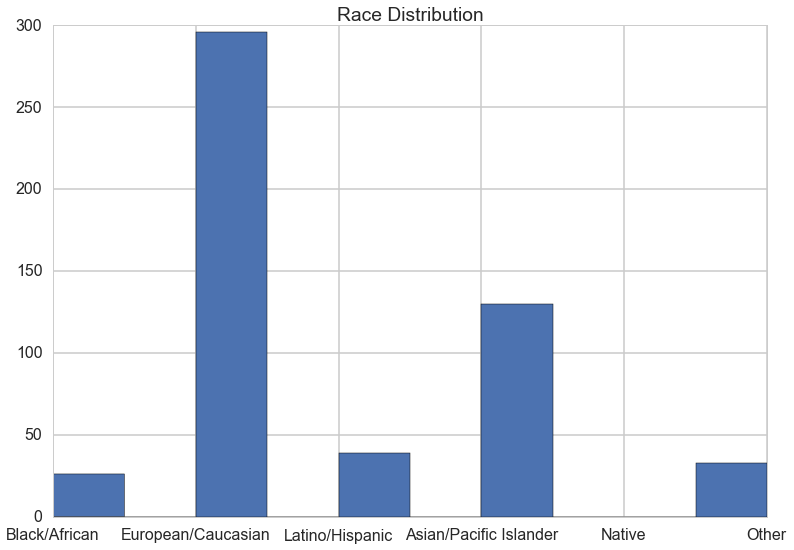

In [266]:
x=[1,2,3,4,5,6]
labels=['Black/African', 'European/Caucasian', 'Latino/Hispanic', 'Asian/Pacific Islander', 'Native', 'Other']
plt.hist(g_df['race_x'].mean().values)
plt.xticks(x, labels)
plt.title('Race Distribution')
plt.legend();

In [106]:
print 'Percentage of matching pairs: ', len(df[df['match_x'] == 1])*1.0 / len(df)*1.0
s_race = np.mean(df[df['race_d_z'] == 1]['match_x'])
d_race = np.mean(df[df['race_d_z'] == 0]['match_x'])
print 'Percentage of matching pairs among same-race pairs: ', s_race
print 'Percentage of matching pairs among different-race pairs: ', d_race

Percentage of matching pairs:  0.163506457818
Percentage of matching pairs among same-race pairs:  0.172690763052
Percentage of matching pairs among different-race pairs:  0.15710955711


#### Importance of partner being the same racial/ethinic background

We see from below that the mean importance of partner being in the same race is higher for women than for men, which indicates that women pay more attention to race than men.

Besides, we also found that among all matching pairs, mean importance of being in the same race is higher for same-race pairs than different-race pairs. This makes sense because if a man and a woman successfully match, it is most possible that they donnot think race plays an important role in finding a partner.

In [189]:
print 'Importance of being in the same race for women: ', np.mean(g_wdf['imprace_x'].mean().values)
print 'Importance of being in the same race for men: ', np.mean(g_mdf['imprace_x'].mean().values)

Importance of being in the same race for women:  4.13513513514
Importance of being in the same race for men:  3.37735849057


In [17]:
print 'Avg imprace for matching pairs of same race: ', np.mean(df[(df['match_x'] == 1) & (df['race_d_z'] == 1)]['imprace_x'])
print 'Avg imprace for matching pairs of difference race: ', np.mean(df[(df['match_x'] == 1) & (df['race_d_z'] == 0)]['imprace_x'])

Avg imprace for matching pairs of same race:  3.91085271318
Avg imprace for matching pairs of difference race:  3.20326409496


#### Importance of partner being the same religious background

Similarly, for religious consideration, women put greater weight than men did. So religion is also a possibly important feature that affect the matching rate.  

In [18]:
print 'Importance of being in the same religion for women :', np.mean(g_wdf['imprelig_x'].mean().values)
print 'Importance of being in the same religoin for men :', np.mean(g_mdf['imprelig_x'].mean().values)

Importance of being in the same religion for women : 4.16602316602
Importance of being in the same religoin for men : 3.07924528302


### Field of Study

Then we look at the feature of field of study. We plotted horizontal bar chart for participants' field of study.

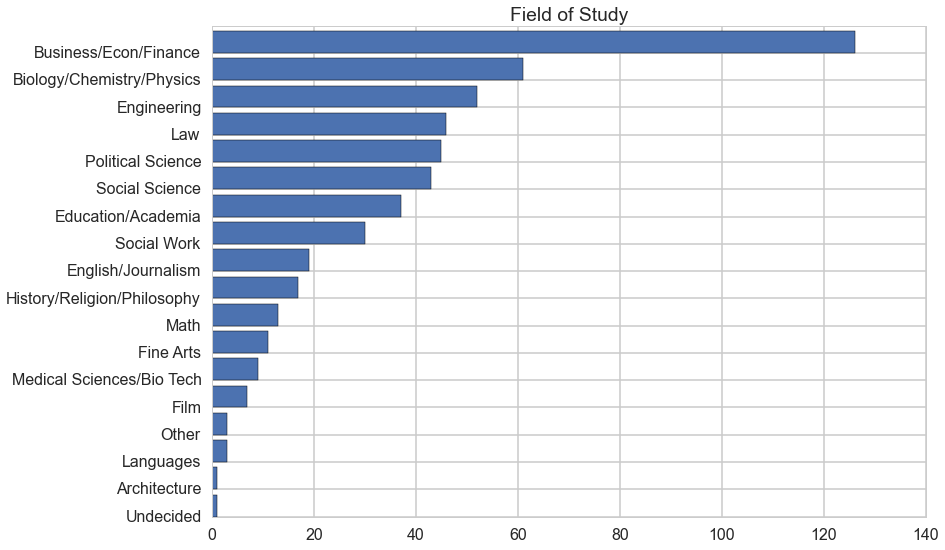

In [22]:
f_cd = g_df['field_cd_x'].mean().values
counts = [(Counter(f_cd)[i+1], i) for i in range(18)]
idx = range(18)
counts_s = sorted(counts)
key_c = []
value_c = []
for v, k in counts_s:
    key_c.append(k+1)
    value_c.append(v) 
labels = ['Undecided', 'Architecture', 'Languages', 'Other', 'Film', 'Medical Sciences/Bio Tech', 'Fine Arts', 'Math', 
         'History/Religion/Philosophy', 'English/Journalism', 'Social Work', 'Education/Academia', 'Social Science', 
         'Political Science', 'Law', 'Engineering', 'Biology/Chemistry/Physics', 'Business/Econ/Finance']
barh(idx, value_c)
plt.yticks(idx, labels)
plt.title('Field of Study')
plt.legend();

Business/finance, sciences and engineering are the three biggest groups participaitng in this event. It could indicate that these majors are more interested in speed dating events, but it is also possible that the number of students in these majors outweigh the others registered in college.

In [107]:
s_fs = np.mean(df[df['field_d_z'] == 1]['match_x'])
d_fs = np.mean(df[df['field_d_z'] == 0]['match_x'])
print 'Matching rate for pairs of same fields of study: ', s_fs
print 'Matching rate for pairs of different fields of study: ', d_fs

Matching rate for pairs of same fields of study:  0.237529691211
Matching rate for pairs of different fields of study:  0.153822249845


It is clear from above that matching rate for pairs of same field of study is much higher than pairs of different field of study. Thus field of study could be a key feature that affect matching rate.

#### Intended career

We also compare the matching rates for pairs of same intended careers and of different intended careers. The former one is higher than the latter one, but the difference is not as large as field of study. 

In [108]:
s_ic = np.mean(df[df['career_d_z'] == 1]['match_x'])
d_ic = np.mean(df[df['career_d_z'] == 0]['match_x'])
print 'Matching rate for pairs of same intended careers: ', s_ic
print 'Matching rate for pairs of same intended careers: ', d_ic

Matching rate for pairs of same intended careers:  0.184568835098
Matching rate for pairs of same intended careers:  0.15883143049


### Primary goal in participating this event

Some people participate the speed dating events for a serious relationship, while others are for fun and to meet new people. The goal of participating in speed dating might affect the success of matching. We first plotted the goal in participating in this speed dating event. Then we discovered that the matching rate for pairs of same goal is very close to that for pairs of different goal. Thus goal is probably not an important feature. 

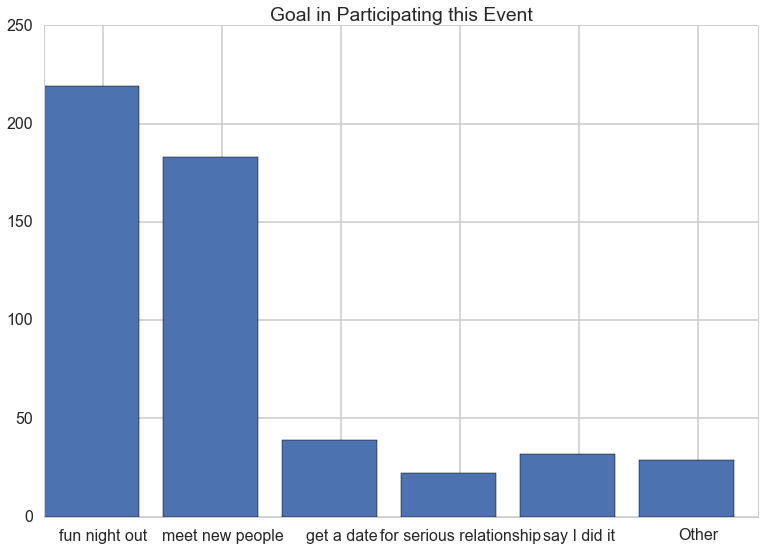

In [25]:
x = [1,2,3,4,5,6]
y_goal = [Counter(g_df['goal_x'].mean().values)[i+1] for i in range(6)]
labels=['fun night out', 'meet new people', 'get a date', 'for serious relationship', 'say I did it', 'Other']
plt.bar(x, y_goal)
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
plt.xticks(x2, labels)
plt.title('Goal in Participating this Event')
plt.legend();

In [109]:
print 'Percentage of pairs with same goal: ', np.mean(df['goal_d_z'])

Percentage of pairs with same goal:  0.796372629843


Reform this feature into a binary variable 'goal_d_z', where 1 indicates same goal, 0 indicates different goals.

In [110]:
s_goal = np.mean(df[df['goal_d_z'] == 1]['match_x'])
d_goal = np.mean(df[df['goal_d_z'] == 0]['match_x'])
print 'Matching rate for same-goal pairs: ', s_goal
print 'Matching rate for different-goal pairs: ', d_goal

Matching rate for same-goal pairs:  0.163216011042
Matching rate for different-goal pairs:  0.164642375169


### Going out frequency

We now look at going out and going on date features by first plotting histograms for both.  

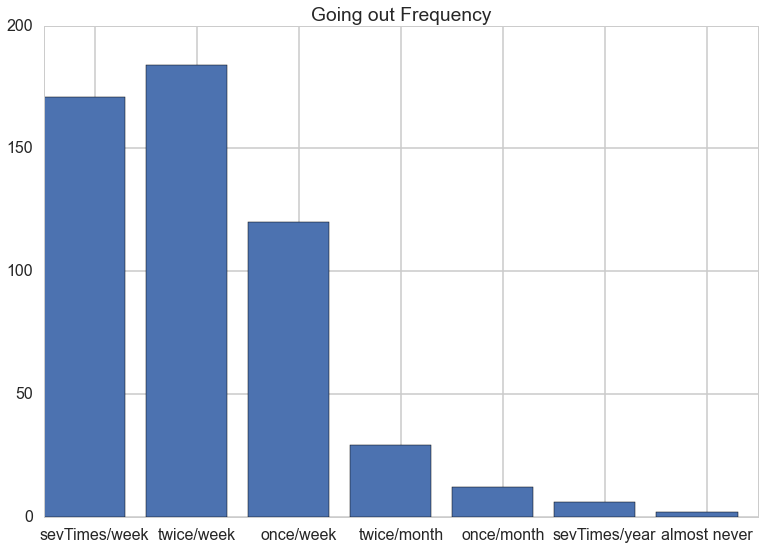

In [267]:
x = [1,2,3,4,5,6,7]
y_out = [Counter(g_df['go_out_x'].mean().values)[i+1] for i in range(7)]
labels=['sevTimes/week', 'twice/week', 'once/week', 'twice/month', 'once/month', 'sevTimes/year', 'almost never']
plt.bar(x, y_out)
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
plt.xticks(x2, labels)
plt.title('Going out Frequency')
plt.legend();

In [111]:
more_go = g_df.apply(lambda g: g[g['go_out_x'].isin([1,2])])
less_go = g_df.apply(lambda g: g[g['go_out_x'].isin([4,5])])
more_out = sum(more_go['match_x'] == 1)*1.0 / len(more_go)*1.0
less_out = sum(less_go['match_x'] == 1)*1.0 / len(less_go)*1.0
print 'Match rate for frequently going_out people: ', more_out
print 'Match rate for less going_out people: ', less_out

Match rate for frequently going_out people:  0.175622812436
Match rate for less going_out people:  0.120418848168


People going out more frequently tend to have higher matching rate. 

### Going on dates frequency

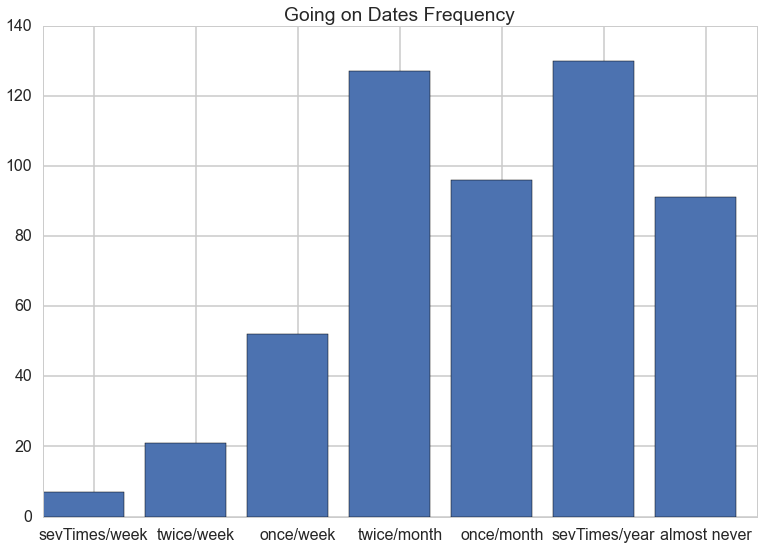

In [268]:
x = [1,2,3,4,5,6,7]
y_date = [Counter(g_df['date_x'].mean().values)[i+1] for i in range(7)]
labels=['sevTimes/week', 'twice/week', 'once/week', 'twice/month', 'once/month', 'sevTimes/year', 'almost never']
plt.bar(x, y_date)
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
plt.xticks(x2, labels)
plt.title('Going on Dates Frequency')
plt.legend();

In [123]:
more_date = g_df.apply(lambda g: g[g['date_x'].isin([1,2])])
less_date = g_df.apply(lambda g: g[g['date_x'].isin([6,7])])
more_ondate = sum(more_date['match_x'] == 1)*1.0 / len(more_date)*1.0
less_ondate = sum(less_date['match_x'] == 1)*1.0 / len(less_date)*1.0
print 'Match rate for frequently going on dates people: ', more_ondate
print 'Match rate for less going on dates people: ', less_ondate

Match rate for frequently going on dates people:  0.232876712329
Match rate for less going on dates people:  0.141933397995


People going on dates more frequently tend to have higher matching rate. 

### Interest Similarity

Similar interests can also be a potential key feature. If the woman and man in a pair have high similarity between interests, there might be higher possibility that they are successfully matched. The interests we include here are: sports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv,  movies, concerts, music, shopping, yoga, etc,.

We first plotted the histogram of interests. We then plotted the inner product of all interests for all participants. We found out that the matching rate for pairs of higher interest similarity is higher than that for pairs of lower interest similarity. Interest is a key feature that we should focus on in later analysis. 

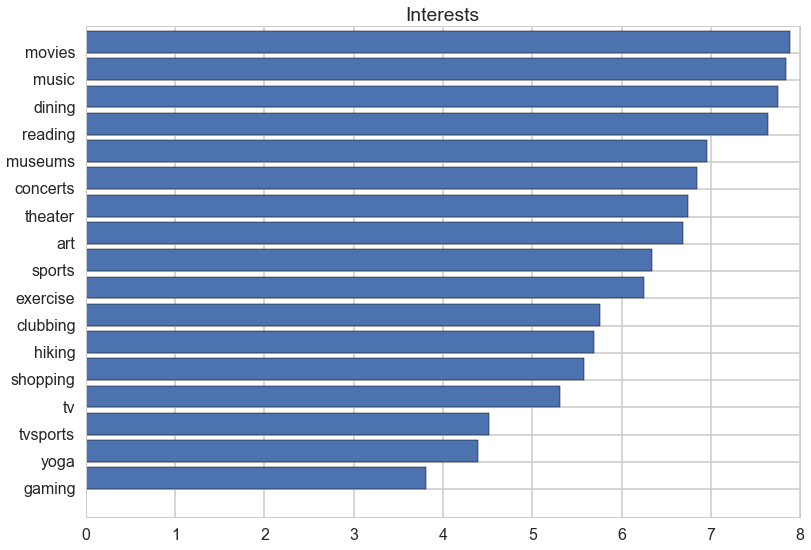

In [262]:
interests = {'sports':np.mean(g_df['sports_x'].mean().values), 'tvsports':np.mean(g_df['tvsports_x'].mean().values), 
             'exercise':np.mean(g_df['exercise_x'].mean().values), 'dining':np.mean(g_df['dining_x'].mean().values),
             'museums':np.mean(g_df['museums_x'].mean().values), 'art':np.mean(g_df['art_x'].mean().values),
             'hiking':np.mean(g_df['hiking_x'].mean().values), 'gaming':np.mean(g_df['gaming_x'].mean().values),
             'clubbing':np.mean(g_df['clubbing_x'].mean().values), 'reading':np.mean(g_df['reading_x'].mean().values),
             'tv':np.mean(g_df['tv_x'].mean().values), 'theater':np.mean(g_df['theater_x'].mean().values),
             'movies':np.mean(g_df['movies_x'].mean().values), 'concerts':np.mean(g_df['concerts_x'].mean().values),
             'music':np.mean(g_df['music_x'].mean().values), 'shopping':np.mean(g_df['shopping_x'].mean().values),
             'yoga':np.mean(g_df['yoga_x'].mean().values)}

s_interests = sorted(interests.items(), key=lambda i: i[1])
labels = [s_interests[i][0] for i in range(len(s_interests))]
values = [s_interests[i][1] for i in range(len(s_interests))]
idx2 = range(1, len(s_interests)+1)
barh(idx2, values)
plt.yticks(idx2, labels)
plt.title('Interests')
plt.legend();

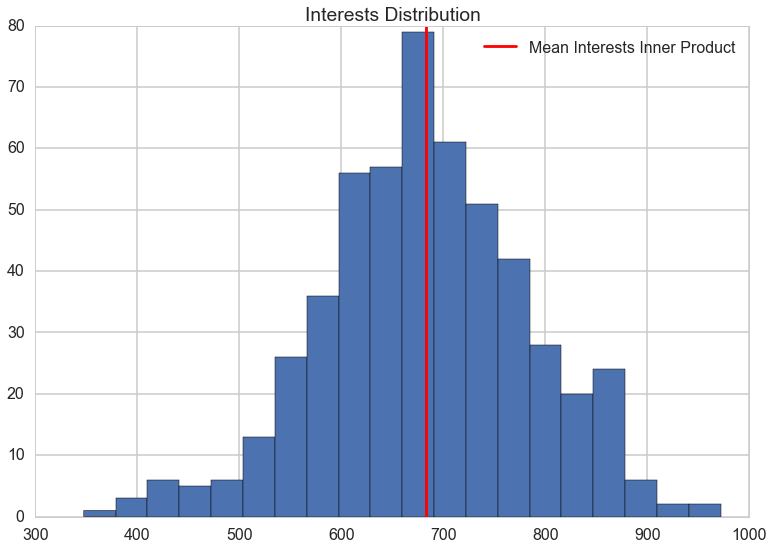

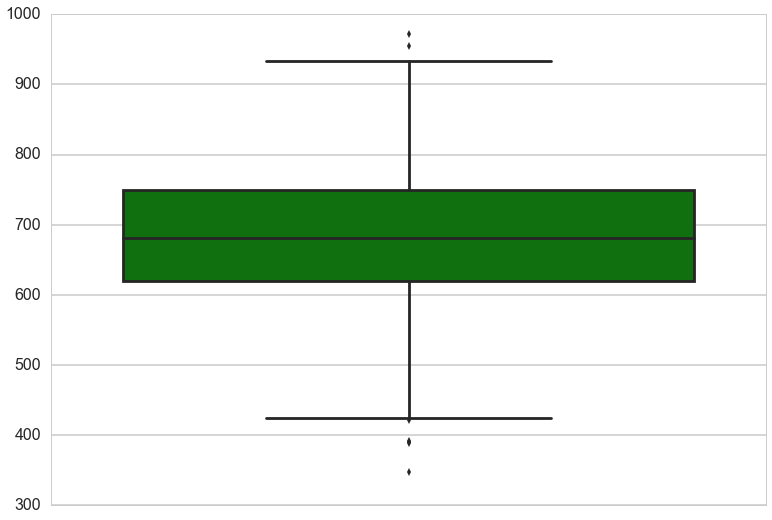

In [254]:
plt.hist(g_df['sum_in_z'].mean().values, bins=20)
plt.axvline(np.mean(g_df['sum_in_z'].mean().values), 0, 1, color='r', label='Mean Interests Inner Product')
plt.title('Interests Distribution')
plt.legend();
plt.show();

sns.boxplot(g_df['sum_in_z'].mean().values, orient="v", color = 'green')
plt.legend();
plt.show();

In [146]:
hobby_m = np.mean(df['sum_in_z'])
more_interests = np.mean(df[df['sum_in_z'] > hobby_m]['match_x'])
less_interests = np.mean(df[df['sum_in_z'] <= hobby_m]['match_x'])
print 'Matching rate for pairs with more similar interests: ', more_interests
print 'Matching rate for pairs with less similar interests: ', less_interests

Matching rate for pairs with more similar interests:  0.183537263626
Matching rate for pairs with less similar interests:  0.143943508963


### Multiple bar plots to compare matching rate for different groups

To get a general idea of how much the features we explored above affect matching rate, we first compare matching rates for pairs with same feature and different feature. The features we plot here are race, field of study, intended career and goal to participate in this event. That means we want to see how much the matching rate for pairs with same race/field of study/intended career/goal differentiate with pairs with different race/field of study/intended career/goal.

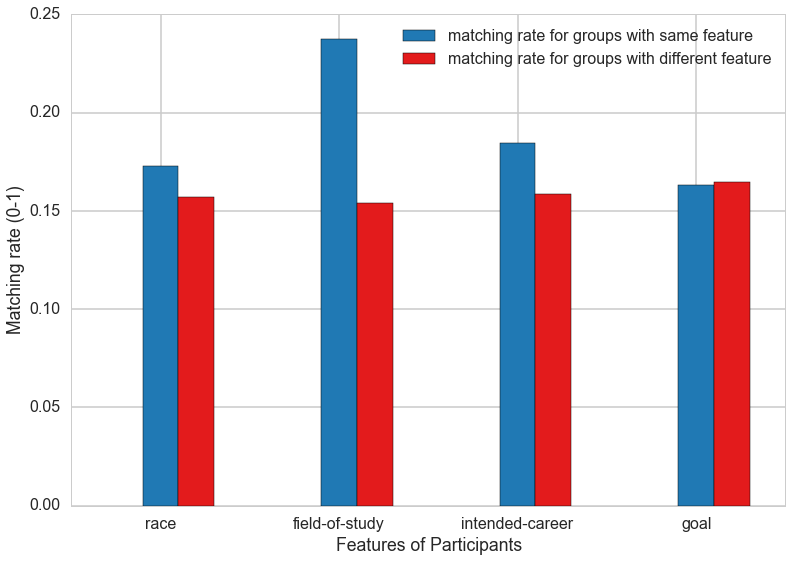

In [187]:
# set up arrays for multiple bar plots
same = [s_race, s_fs, s_ic, s_goal]
diff = [d_race, d_fs, d_ic, d_goal]

x = range(4)
x2 = [0.2, 1.2, 2.2, 3.2]
ax = plt.subplot(111)
ax.bar(x, same, width=0.2, color=sns.color_palette("Paired")[1], align='center', label='matching rate for groups with same feature')
ax.bar(x2, diff, width=0.2, color=sns.color_palette("Paired")[5], align='center', label='matching rate for groups with different feature')

labels = ['race', 'field-of-study', 'intended-career', 'goal']
plt.xticks(x, labels)
ax.set_xlabel('Features of Participants')
ax.set_ylabel('Matching rate (0-1)')
plt.legend();
plt.show()

We also compare matching rates for pairs with more occurring feature and less occurring feature. The features we plot here are going out, going on date, and interests similarity. That means we want to see how much the matching rate for people who are going out more/going on date more/whose partners having more similar interests diferentiate with people who are going out less/going on date less/whose partners having less similar interests.

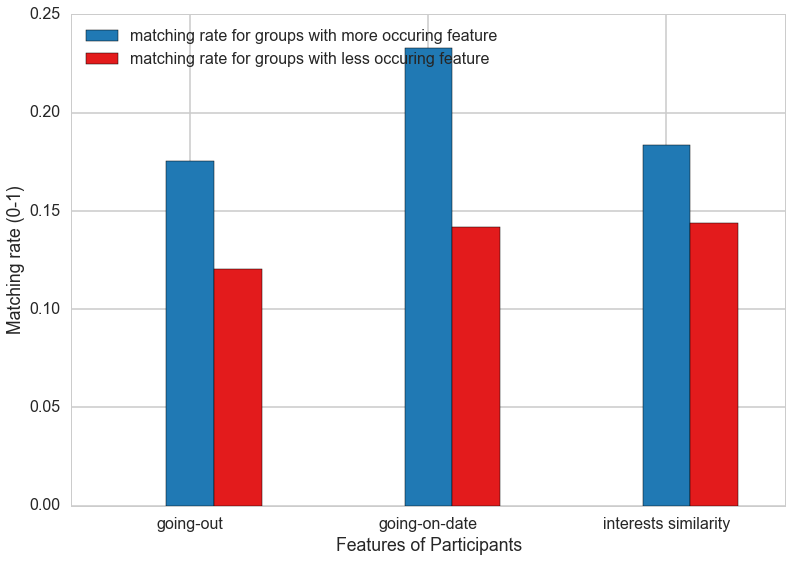

In [188]:
more = [more_out, more_ondate, more_interests]
less = [less_out, less_ondate, less_interests]

x3 = [0, 1, 2]
x4 = [0.2, 1.2, 2.2]
ax = plt.subplot(111)
ax.bar(x3, more, width=0.2, color=sns.color_palette("Paired")[1], align='center', label='matching rate for groups with more occuring feature')
ax.bar(x4, less, width=0.2, color=sns.color_palette("Paired")[5], align='center', label='matching rate for groups with less occuring feature')

labels = ['going-out', 'going-on-date', 'interests similarity']
plt.xticks(x3, labels)
ax.set_xlabel('Features of Participants')
ax.set_ylabel('Matching rate (0-1)')
plt.legend(loc=2);
plt.show()

### Attributes people looking for in the opposite sex

In the surveys before the dating start, participants were asked to answer questions like the attributes they look for in the opposite sex, and the attributes they think the opposite sex look for. These answers can be highly correlated to the success of matching. If a participant's partner has the exact characteristics that this participant is looking for, then the possibility of matching can be high. 

In [34]:
w_attr = np.mean(g_wdf['attr1_1_x'].mean().values)
w_sin = np.mean(g_wdf['sinc1_1_x'].mean().values)
w_int = np.mean(g_wdf['intel1_1_x'].mean().values)
w_fun = np.mean(g_wdf['fun1_1_x'].mean().values)
w_amb = np.mean(g_wdf['amb1_1_x'].mean().values)
w_shar = np.mean(g_wdf['shar1_1_x'].mean().values)
w_features = [w_attr, w_sin, w_int, w_fun, w_amb, w_shar]

print 'For women: '
print 'Attractive: ', w_attr
print 'Sincere: ', w_sin
print 'Intelligent: ', w_int
print 'Fun: ', w_fun
print 'Ambitious: ', w_amb
print 'Shared interests/hobbies: ', w_shar

For women: 
Attractive:  18.0116216216
Sincere:  18.1756370656
Intelligent:  20.9455984556
Fun:  17.2330501931
Ambitious:  12.871969112
Shared interests/hobbies:  12.7432432432


In [35]:
m_attr = np.mean(g_mdf['attr1_1_x'].mean().values)
m_sin = np.mean(g_mdf['sinc1_1_x'].mean().values)
m_int = np.mean(g_mdf['intel1_1_x'].mean().values)
m_fun = np.mean(g_mdf['fun1_1_x'].mean().values)
m_amb = np.mean(g_mdf['amb1_1_x'].mean().values)
m_shar = np.mean(g_mdf['shar1_1_x'].mean().values)
m_features = [m_attr, m_sin, m_int, m_fun, m_amb, m_shar]

print 'For men: '
print 'Attractive: ', m_attr
print 'Sincere: ', m_sin
print 'Intelligent: ', m_int
print 'Fun: ', m_fun
print 'Ambitious: ', m_amb
print 'Shared interests/hobbies: ', m_shar

For men: 
Attractive:  27.3026037736
Sincere:  16.327245283
Intelligent:  19.399509434
Fun:  17.5507924528
Ambitious:  8.61056603774
Shared interests/hobbies:  11.0321886792


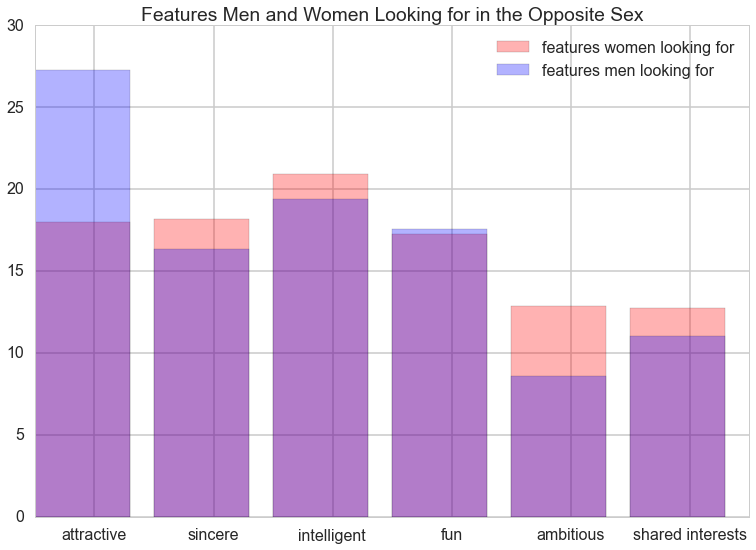

In [65]:
x = [1,2,3,4,5,6]
plt.bar(x, w_features, alpha = 0.3, color = 'red', label = 'features women looking for')
plt.bar(x, m_features, alpha = 0.3, color = 'blue', label = 'features men looking for')
labels=['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests']
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
plt.xticks(x2, labels)
plt.title('Features Men and Women Looking for in the Opposite Sex')
plt.legend();

Men generally think attractiveness is the most important factor in potential women to date; whereas women generally think being sincere and ambitious are the most important factors. The results below implies that if the participant has lower expectation for attractiveness, the matching rate could be higher. This especially applies to men, since the matching rate difference is large for men than women. This means attractiveness plays an important role when men choose women.

In [37]:
print 'For women participants: '
print 'Avg attractiveness for partner: ', np.mean(wdf['attr1_1_y'])
print 'Matching rate if partner has high expectation for attractiveness: ', np.mean(wdf[wdf['attr1_1_y'] > 27.07]['match_x'])
print 'Matching rate if partner has low expectation for attractiveness: ', np.mean(wdf[wdf['attr1_1_y'] <= 27.07]['match_x'])

For women participants: 
Avg attractiveness for partner:  27.0695081066
Matching rate if partner has high expectation for attractiveness:  0.15866873065
Matching rate if partner has low expectation for attractiveness:  0.166169578185


In [38]:
print 'For men participants: '
print 'Avg attractiveness for partner: ', np.mean(mdf['attr1_1_y'])
print 'Matching rate if partner has high expectation for attractiveness: ', np.mean(mdf[mdf['attr1_1_y'] > 18.06]['match_x'])
print 'Matching rate if partner has low expectation for attractiveness: ',np.mean(mdf[mdf['attr1_1_y'] <= 18.06]['match_x'])

For men participants: 
Avg attractiveness for partner:  18.0623962627
Matching rate if partner has high expectation for attractiveness:  0.160951714486
Matching rate if partner has low expectation for attractiveness:  0.165158371041


#### Features Paricipants Think the Opposite Sex looking for

In [39]:
w_attr2 = np.mean(g_wdf['attr2_1_x'].mean().values)
w_sin2 = np.mean(g_wdf['sinc2_1_x'].mean().values)
w_int2 = np.mean(g_wdf['intel2_1_x'].mean().values)
w_fun2 = np.mean(g_wdf['fun2_1_x'].mean().values)
w_amb2 = np.mean(g_wdf['amb2_1_x'].mean().values)
w_shar2 = np.mean(g_wdf['shar2_1_x'].mean().values)
w_features2 = [w_attr2, w_sin2, w_int2, w_fun2, w_amb2, w_shar2]

print 'Women think men looking for: '
print 'Attractive: ', w_attr2
print 'Sincere: ', w_sin2
print 'Intelligent: ', w_int2
print 'Fun: ', w_fun2
print 'Ambitious: ', w_amb2
print 'Shared interests/hobbies: ', w_shar2

Women think men looking for: 
Attractive:  35.5759073359
Sincere:  11.3794208494
Intelligent:  12.5358301158
Fun:  18.8062548263
Ambitious:  9.19158301158
Shared interests/hobbies:  12.6734362934


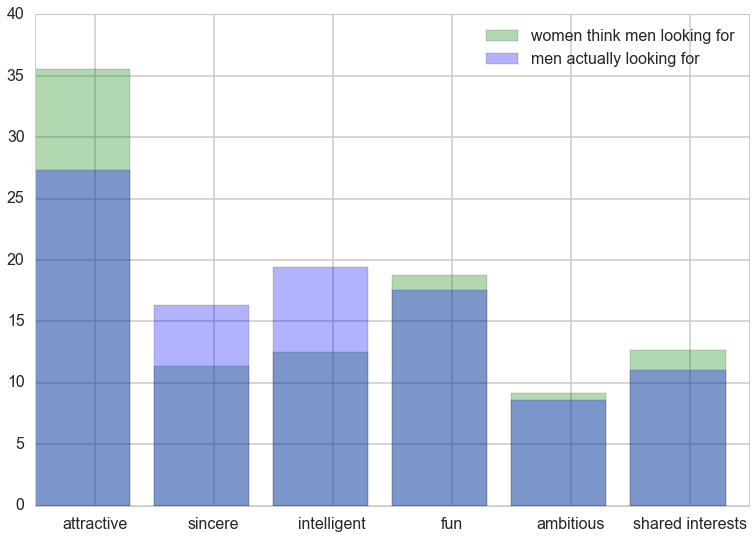

In [64]:
x = [1,2,3,4,5,6]
plt.bar(x, w_features2, alpha = 0.3, color = 'green', label = 'women think men looking for')
plt.bar(x, m_features, alpha = 0.3, color = 'blue', label = 'men actually looking for')
labels=['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests']
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
plt.xticks(x2, labels)
plt.legend();

From the above plots, we could see that women generally think men focus more on attractiveness, which is even greater than men actually look for, whereas women think men focus much less on being sincere and intelligent, which is even less than men actually look for. 

In [41]:
m_attr2 = np.mean(g_mdf['attr2_1_x'].mean().values)
m_sin2 = np.mean(g_mdf['sinc2_1_x'].mean().values)
m_int2 = np.mean(g_mdf['intel2_1_x'].mean().values)
m_fun2 = np.mean(g_mdf['fun2_1_x'].mean().values)
m_amb2 = np.mean(g_mdf['amb2_1_x'].mean().values)
m_shar2 = np.mean(g_mdf['shar2_1_x'].mean().values)
m_features2 = [m_attr2, m_sin2, m_int2, m_fun2, m_amb2, m_shar2]

print 'Men think women looking for: '
print 'Attractive: ', m_attr2
print 'Sincere: ', m_sin2
print 'Intelligent: ', m_int2
print 'Fun: ', m_fun2
print 'Ambitious: ', m_amb2
print 'Shared interests/hobbies: ', m_shar2

Men think women looking for: 
Attractive:  25.0196603774
Sincere:  15.0950566038
Intelligent:  16.3643018868
Fun:  17.934754717
Ambitious:  14.4028301887
Shared interests/hobbies:  11.094


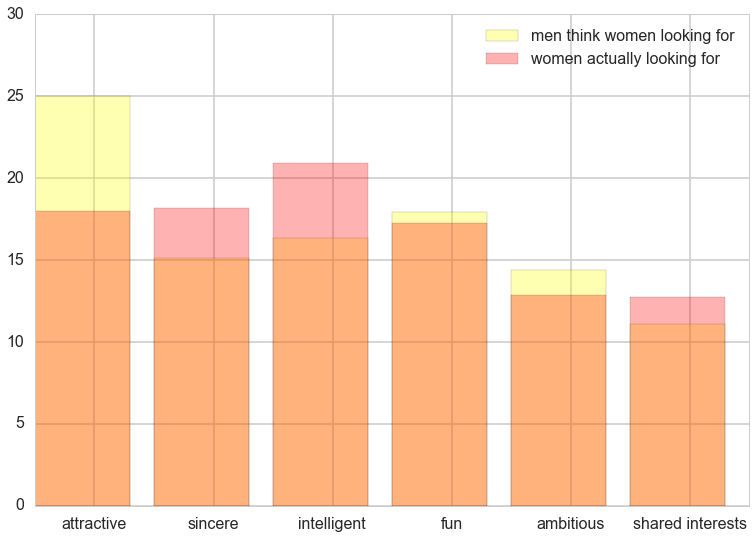

In [67]:
x = [1,2,3,4,5,6]
plt.bar(x, m_features2, alpha = 0.3, color = 'yellow', label = 'men think women looking for')
plt.bar(x, w_features, alpha = 0.3, color = 'red', label = 'women actually looking for')
labels=['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests']
x2 = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
plt.xticks(x2, labels)
#plt.title('Features Men and Women Looking for in the Opposite Sex')
plt.legend();

We could interpret from above plot that men think women take attractiveness as an important factor like themselves, but women actually put less weight on attractiveness. Men also think women do not look for being sincere and intelligent that much, while women actually do. Connecting to our previous plot, women know men better than men know women, which is interesting to think of in reality :)

#### Create a table to compare the above 4 plots

In [103]:
# create a dictionary for table
d = {'women look for': w_features, 'men look for': m_features, 
      'women think men look for': w_features2, 'men think women look for': m_features2}
df_tab = pd.DataFrame(d)
df_tab.index = ['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared interests']
df_tab.T

,attractive,sincere,intelligent,fun,ambitious,shared interests
men look for,27.302604,16.327245,19.399509,17.550792,8.610566,11.032189
men think women look for,25.019660,15.095057,16.364302,17.934755,14.402830,11.094000
women look for,18.011622,18.175637,20.945598,17.233050,12.871969,12.743243
women think men look for,35.575907,11.379421,12.535830,18.806255,9.191583,12.673436


### Expected vs. Actual Happiness with Partners Participants meet

We plotted the difference between the expected happiness and actual satisfaction after event. We found out the difference roughly follows a Gaussian distribution with mean very close to 0. This implies participants' expected happiness is mostly the similar to satisfaction after event. 

Mean difference:  -0.191714756801


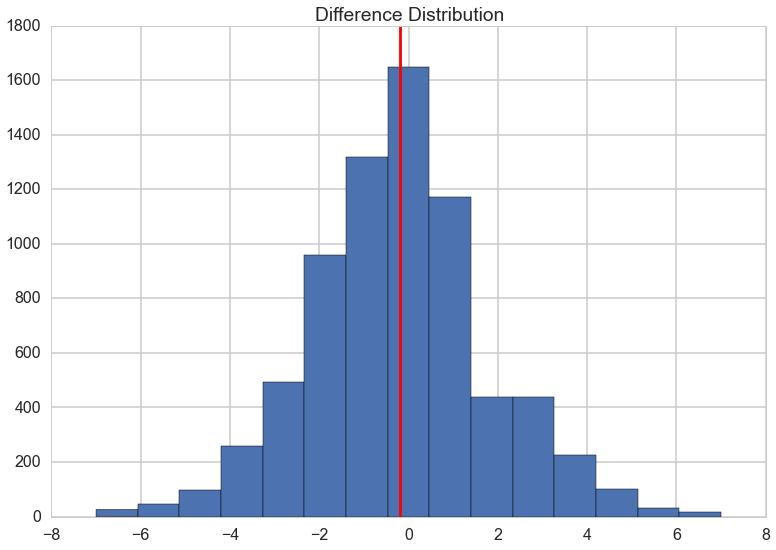

In [45]:
# difference between 'how happy do you expect to be with people you meet' and
# 'how satisfied were you with the people you met'
happy_diff = df['exphappy_x'] - df['satis_2_x']
plt.hist(happy_diff, bins = 15)

plt.axvline(np.mean(happy_diff), 0, 1, color='r', label='Mean Difference')
print 'Mean difference: ', np.mean(happy_diff)
plt.title('Difference Distribution')
plt.show();

Looks roughly like normal, with mean very close to 0.

### Participants' origin

There are only around 5% of pairs from the same origin, but the matching rate for pairs from same origins is much higher than that for pairs from different origins. Origin could be an important factor. However it is also possible that since there are too few pairs from the same origin, they are not representative enough. 

In [46]:
print 'Percentage of pairs with same origin: ', np.mean(df['from_d_z'])

Percentage of pairs with same origin:  0.0568837592745


In [47]:
print 'Matching rate for pairs with same origin: ', np.mean(df[df['from_d_z'] == 1]['match_x'])
print 'Matching rate for pairs with different origin: ', np.mean(df[df['from_d_z'] == 0]['match_x'])

Matching rate for pairs with same origin:  0.19806763285
Matching rate for pairs with different origin:  0.161421911422


Pairs of the same origin have higher matching rate than those of different origin.

## Pearson Correlation

We can get a notion of which features are important in the classification process by seeing how they correlate with the response. The code below is to obtain the Pearson correlation coefficient between each of our features and the response 'match'.

Remove the features from surveys after events, since our goal is to predict a match. 

In [169]:
# get a list of all features
lcols = list(df.columns)
lcols.remove('match_x'); lcols.remove('iid'); lcols.remove('gender_x'); lcols.remove('piid'); lcols.remove('from_x');
lcols.remove('from_y'); lcols.remove('undergra_x'); lcols.remove('undergra_y'); lcols.remove('like_x');
lcols.remove('attr_x'); lcols.remove('sinc_x'); lcols.remove('intel_x'); lcols.remove('fun_x');lcols.remove('amb_x'); 
lcols.remove('shar_x'); lcols.remove('prob_x'); 
lcols.remove('attr_y'); lcols.remove('sinc_y'); lcols.remove('intel_y'); lcols.remove('fun_y');lcols.remove('amb_y'); 
lcols.remove('shar_y'); lcols.remove('satis_2_x'); lcols.remove('satis_2_y');
print len(lcols)

179


#### Pearson Correlation for Classification (predict 'match')

In [171]:
from scipy.stats.stats import pearsonr

correlations=[]
for col in lcols:
    r=pearsonr(df[col], df['match_x'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))
bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
field_d_z,0.072396,0.072396
sum_in_z,0.066858,0.066858
date_y,0.065759,-0.065759
date_x,0.065759,-0.065759
go_out_y,0.063689,-0.063689
go_out_x,0.063689,-0.063689
f4medical_sci_x,0.058953,0.058953
f4medical_sci_y,0.058953,0.058953
clubbing_y,0.057173,0.057173


We could see from above absolute correlations that field of study, interests, if the participants like to going out and going on date are mostly related to the response 'match'. Thus the features listed above can be used to run classification to see how well predict match. 